<a href="https://colab.research.google.com/github/EduardoMoraesRitter/Titanic-Machine-Learning-from-Disaster/blob/master/clusterizacao_kmean_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://chrisalbon.com/machine_learning/clustering/k-means_clustering/

   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]
    Age     Fare
0  22.0   7.2500
1  38.0  71.2833
2  26.0   7.9250
3  35.0  53.1000
4  35.0   8.0500
Top terms per cluster:

 Cluster 0:
[38.0, 71.2833]
[22.0, 7.25]

 Cluster 1:
[38.0, 71.2833]
[22.0, 7.25]

 Cluster 2:
[22.0, 7.25]
[38.0, 71.2833]


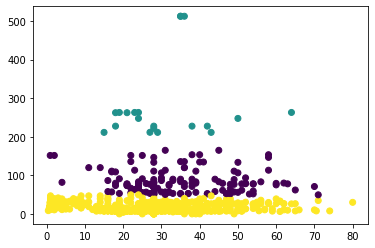

In [9]:
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns

train = pd.read_csv('https://raw.githubusercontent.com/EduardoMoraesRitter/Titanic-Machine-Learning-from-Disaster/master/train.csv')
print(train.head())

train_simples = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'PassengerId', 'SibSp' , 'Parch', 'Pclass', 'Embarked', 'Sex', 'Survived'], axis=1)



from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

imputer.fit(train_simples)
train_no_null = imputer.transform(train_simples)
train_simples = pd.DataFrame(train_no_null, columns=train_simples.columns)
print(train_simples.head())


from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

model = KMeans(n_clusters=3)
model.fit(train_simples)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
for i in range(3):
    print("\n Cluster %d:" % i),
    for ind in order_centroids[i, :100]:
        print(train_simples.iloc[ind].tolist())#('   %s' % terms[ind]),
    print


pl.scatter(train_simples.Age, train_simples.Fare, c = model.labels_)

https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

In [0]:
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [3]:
train = pd.read_csv('https://raw.githubusercontent.com/EduardoMoraesRitter/Titanic-Machine-Learning-from-Disaster/master/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/EduardoMoraesRitter/Titanic-Machine-Learning-from-Disaster/master/test.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


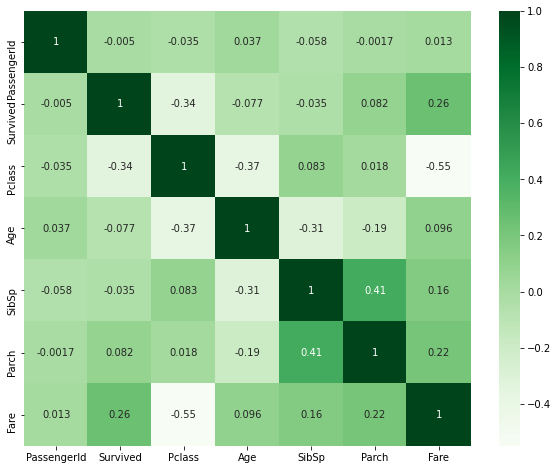

In [4]:
pl.figure(figsize=(10,8))
sns.heatmap(train.corr(), annot=True, cmap='Greens')

In [0]:
train.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)
test.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [6]:
print('antes \n', train.isnull().sum())

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

train_numerico = train.drop(['Sex','Embarked'], axis=1)
test_numerico = test.drop(['Sex','Embarked'], axis=1)

imputer.fit(train_numerico)
train_no_null = imputer.transform(train_numerico)

imputer.fit(test_numerico)
test_no_null = imputer.transform(test_numerico)

train_tr = pd.DataFrame(train_no_null, columns=train_numerico.columns)
test_tr = pd.DataFrame(test_no_null, columns=test_numerico.columns)

print('\n depois \n', train_tr.isnull().sum())

print(train_tr.head())

antes 
 Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

 depois 
 Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64
   Survived  Pclass   Age  SibSp  Parch     Fare
0       0.0     3.0  22.0    1.0    0.0   7.2500
1       1.0     1.0  38.0    1.0    0.0  71.2833
2       1.0     3.0  26.0    0.0    0.0   7.9250
3       1.0     1.0  35.0    1.0    0.0  53.1000
4       0.0     3.0  35.0    0.0    0.0   8.0500


In [7]:
train_cat = train[['Sex', 'Embarked']]
test_cat = test[['Sex', 'Embarked']]

train_cat_encoded = pd.get_dummies(train_cat)
test_cat_encoded = pd.get_dummies(test_cat)

train_cat_encoded.head()

train = train_tr.join(train_cat_encoded)
train = test_tr.join(test_cat_encoded)
train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892.0,3.0,34.5,0.0,0.0,7.8292,0,1,0,1,0
1,893.0,3.0,47.0,1.0,0.0,7.0000,1,0,0,0,1
2,894.0,2.0,62.0,0.0,0.0,9.6875,0,1,0,1,0
3,895.0,3.0,27.0,0.0,0.0,8.6625,0,1,0,0,1
4,896.0,3.0,22.0,1.0,1.0,12.2875,1,0,0,0,1


In [8]:
train.drop(['Pclass', 'PassengerId'], axis=1, inplace=True)
train.head()

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,34.5,0.0,0.0,7.8292,0,1,0,1,0
1,47.0,1.0,0.0,7.0000,1,0,0,0,1
2,62.0,0.0,0.0,9.6875,0,1,0,1,0
3,27.0,0.0,0.0,8.6625,0,1,0,0,1
4,22.0,1.0,1.0,12.2875,1,0,0,0,1


[KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0), KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0), KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0), KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0), KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0), KMeans(algorithm='auto', copy

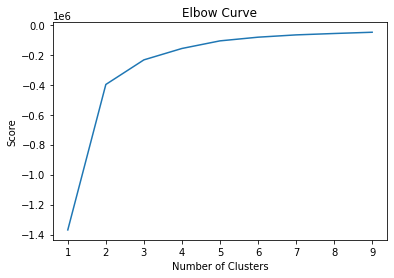

In [28]:
Nc = range(1, 10)
kmeans_list = [KMeans(n_clusters=i) for i in Nc]
print(kmeans_list)
score = [kmeans_list[i].fit(train).score(train) for i in range(len(kmeans_list))]
score
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [13]:
pl.figure(figsize=(12, 6))
pl.plot(range(1, 40), error, color='black', linestyle='dashed', marker='o',
         markerfacecolor='grey', markersize=10)
pl.title('Error Rate K Value')
pl.xlabel('K Value')
pl.ylabel('Mean Error')

NameError: ignored

<Figure size 864x432 with 0 Axes>

In [14]:
model = KMeans(n_clusters=4, init='k-means++', max_iter=100, n_init=1)
model.fit(train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=4, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [27]:
#model.cluster_centers_.argsort()[:, ::-1]
model.labels_
#order_centroids = model.cluster_centers_.argsort()[:, ::-1]
#order_centroids
# for i in range(4):
#     print("\n Cluster %d:" % i),
#     for ind in order_centroids[i, :1000]:
#         print(ind)#train.iloc[ind].tolist())
#     print

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 2, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 3, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 0, 2, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 3, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 3, 0, 0,
       3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0,

In [0]:
import numpy as np
z = pl.scatter(train.Fare, train.Age, train.Pclass, c = model.labels_)

https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html

Automatically created module for IPython interactive environment


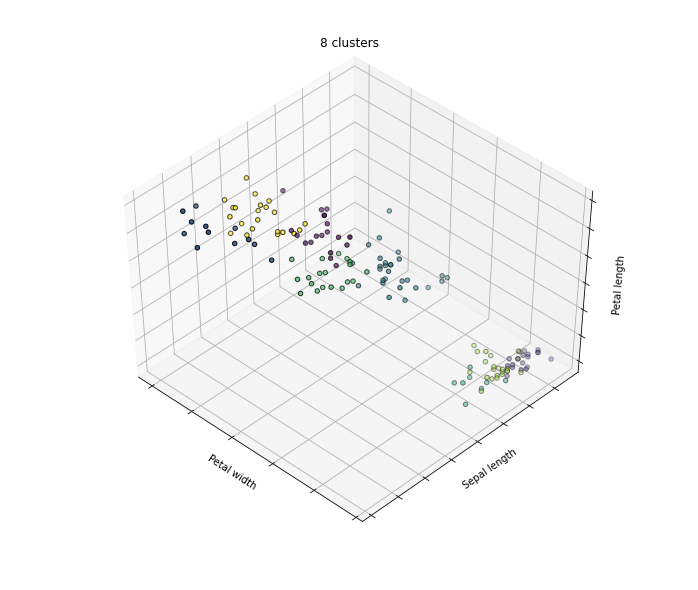

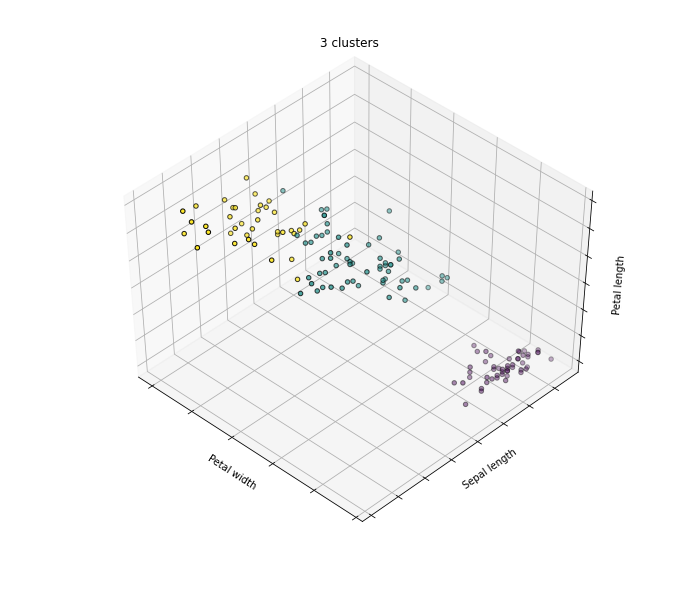

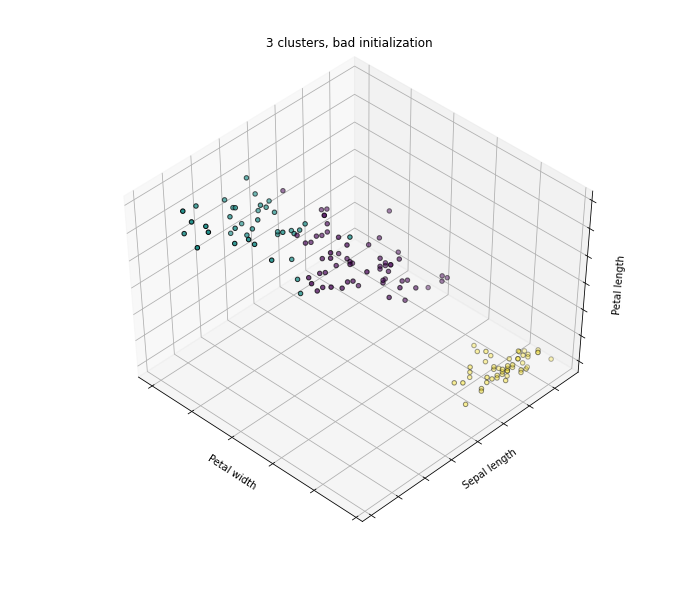

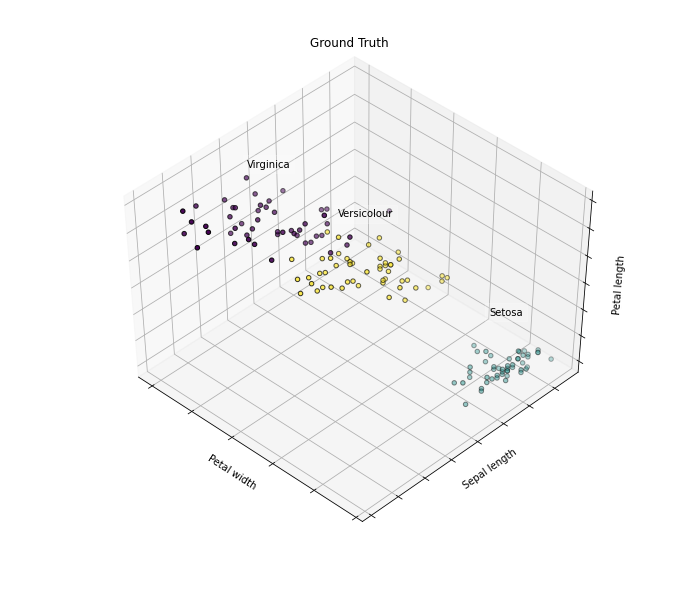

In [143]:
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(10, 8))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(10, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()